**HW 4 - Clustering (K-Means, DP Means)**

Due Wed. March 27, 2019 - Before class starts.

**Problem 1:  K-Means**

Here you will apply K-Means on simple Gaussian data. You are given some code to assist you in implementing this clustering method.  Online code for k-means along with the built-in scikitlearn function for K-Means are prohibited. 
    

**(a)** Generate $3$ $2$D Gaussian clusters of data with the following means and covariances:

$\boldsymbol{\mu}_1 = [2,2]^T, \boldsymbol{\mu}_2 = [-2,-2]^T, \boldsymbol{\mu}_3 = [0,-2]^T$,

$\Sigma_1 = [[0.02,0];[0,0.02]]$, $\Sigma_2 = [[0.2,0];[0,0.2]]$, $\Sigma_3 = [[0.05,0];[0,0.05]]$ 

Let each cluster of data have $50$ points. Plot the generated Gaussian data.

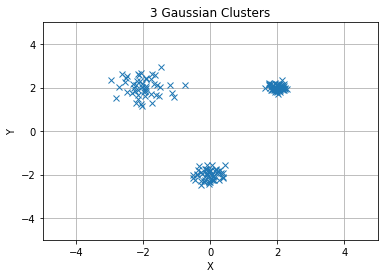

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 2D Gaussian Data with 3 clusters of 3 different means
num_pts = 50
x1, y1 = np.random.multivariate_normal([2,2], [[0.02,0],[0,0.02]], num_pts).T
x2, y2 = np.random.multivariate_normal([-2,2], [[0.2,0],[0,0.2]], num_pts).T
x3, y3 = np.random.multivariate_normal([0,-2], [[0.05,0],[0,0.05]], num_pts).T

x_total = np.zeros((3*num_pts,1))
x_total[0:num_pts,0] = x1
x_total[num_pts:2*num_pts,0] = x2
x_total[2*num_pts:3*num_pts,0] = x3

y_total = np.zeros((3*num_pts,1))
y_total[0:num_pts,0] = y1
y_total[num_pts:2*num_pts,0] = y2
y_total[2*num_pts:3*num_pts,0] = y3

DATA = np.concatenate((x_total,y_total),axis=1)

# Plotting
plt.plot(x_total,y_total,'x')
ax = plt.gca()
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('3 Gaussian Clusters')
plt.show()



**(b)** Implement K-Means and apply it to the Gaussian data above. The code below contains comments of what needs to be coded up at a specific part of the code.  Please write your code below these comments where necessary. 

Plot the created clusters per iteration in different colors. For convergence of the algorithm (stopping criterion), check whether the derived cluster means become stationary (don't change over iterations).  

Iteration:  1


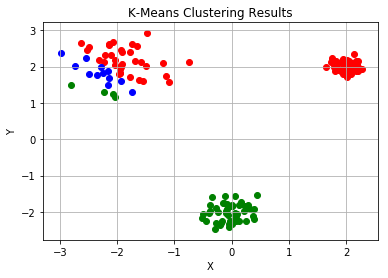

Iteration:  2


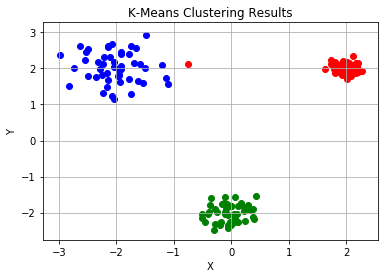

Iteration:  3


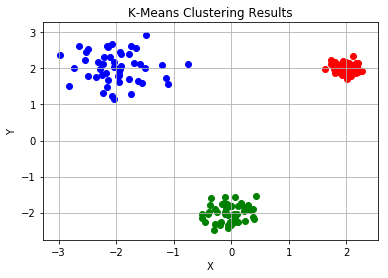

In [5]:
## K-Means implementation:

num_clusters = 3

### CODE 1 - Randomly initialize 3 means: ###
## Write code below here:
mean_1_previous = (4-(-4))*np.random.rand(2,1)+(-4)
mean_2_previous = (4-(-4))*np.random.rand(2,1)+(-4)
mean_3_previous = (4-(-4))*np.random.rand(2,1)+(-4)
mean_1_current = np.copy(mean_1_previous)
mean_2_current = np.copy(mean_2_previous)
mean_3_current = np.copy(mean_3_previous)


##############################################

# initializations
labels = np.ones((DATA.shape[0],1))
converged = 0
iteration = 0
convergence_threshold = 2
while (converged==0):
    iteration += 1
    print('Iteration: ',iteration)
    
    ### CODE 2 - Assignment Step - Assign each data observation to the cluster with the nearest mean: ###
    ## Write code below here:
    for i in np.arange(DATA.shape[0]):
        d1 = np.linalg.norm(DATA[i,:].T - mean_1_current)
        d2 = np.linalg.norm(DATA[i,:].T - mean_2_current)
        d3 = np.linalg.norm(DATA[i,:].T - mean_3_current)
        
        labels[i] = np.argmin(np.array([d1,d2,d3])) + 1
    
    ###################################################################
    
    
    ### CODE 3 - Mean Updating - Update the cluster means ###
    ## Write code below here:
    mean_1_previous = np.copy(mean_1_current)
    a=(labels==1)
    if (np.sum(a)>0):
        mean_1_current = np.mean(DATA[a.ravel(),:],axis=0)
    else:
        mean_1_current = np.array([0,0]).T    
    
    mean_2_previous = np.copy(mean_2_current)
    b=(labels==2)
    if (np.sum(b)>0):
        mean_2_current = np.mean(DATA[b.ravel(),:],axis=0)
    else:
        mean_2_current = np.array([0,0]).T 

    mean_3_previous = np.copy(mean_3_current)
    c=(labels==3)
    if (np.sum(c)>0):
        mean_3_current = np.mean(DATA[c.ravel(),:],axis=0)
    else:
        mean_3_current = np.array([0,0]).T 

    ###########################################################
    
    ### CODE 4 - Check for convergence ###
    ## Write code below here:
    test_value = np.linalg.norm(mean_1_current-mean_1_previous) + np.linalg.norm(mean_2_current-mean_2_previous) + np.linalg.norm(mean_3_current-mean_3_previous)
    if (test_value < convergence_threshold):
        converged=1
    
    #############################################################
    
    ### CODE 5 - Plot clustering results after each iteration: ###
    ## Write code below here:

    plt.figure()
    a=(labels==1)
    b=(labels==2)
    c=(labels==3)
    plt.scatter(DATA[a.ravel(),0],DATA[a.ravel(),1],c='r')
    plt.scatter(DATA[b.ravel(),0],DATA[b.ravel(),1],c='g')
    plt.scatter(DATA[c.ravel(),0],DATA[c.ravel(),1],c='b')
    plt.grid()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('K-Means Clustering Results')
    plt.show()
    
    ###################################################################



**Problem 2: DP Means**

Here, you will implement DP-Means and test it out on National Basketball Association (NBA) data from the 2018-2019 season (currently ongoing season).



**(a)** Describe what the $\lambda$ parameter does in the DP-Means algorithm discussed in class. 

$\lambda$ is just a distance threshold parameter that is used to generate new clusters in DP-Means if a certain point is far enough from all existing clusters. 

**(b)** Read in the NBA data from the ''NBA_stats_2018_2019.xlsx'' file and plot the Minutes Per Game (MPG) vs Points Per Game (PPG) statistics for all NBA players (a player is represented by a row of the data).  

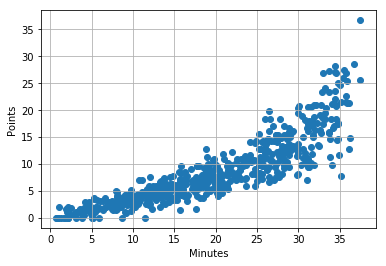

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

################################
## Load data from spreadsheet ##
################################

# Load spreadsheet into dataframe 'df1'
filename = 'NBA_stats_2018_2019.xlsx'
xl = pd.ExcelFile(filename)
df1 = xl.parse('Sheet1')

############################
## Plot data - MPG vs PPG ##
############################

points = df1['PPG'].values
minutes = df1['MPG'].values

# define data matrix to use with k-means
data_matrix = np.stack((minutes, points), axis=-1)

fig = plt.figure()
ax2 = fig.add_subplot(111)#, projection='3d')
ax2.scatter(minutes, points)

ax2.set_xlabel('Minutes')
ax2.set_ylabel('Points')
plt.grid()
plt.show()

**(c)** Implement DP-Means and apply it to the $2$D (MPG, PPG) NBA data obtained above. The code below contains comments of what needs to be coded up at a specific part of the code.  Please write your code below these comments where necessary. 

Plot the created clusters per iteration in different colors. For convergence of the algorithm (stopping criterion), check whether the derived cluster means become stationary (don't change over iterations) and the number of existing clusters also stays the same.  

Current iteration:  1


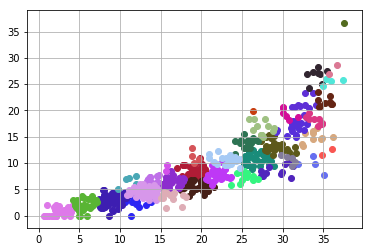

Number of clusters:  35
Current iteration:  2


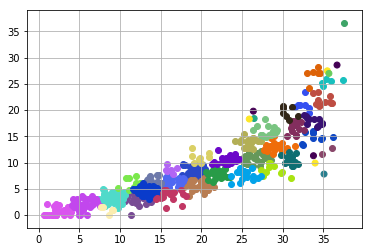

Number of clusters:  36
Current iteration:  3


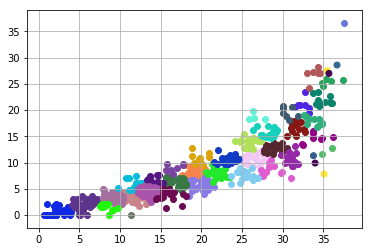

Number of clusters:  37
Current iteration:  4


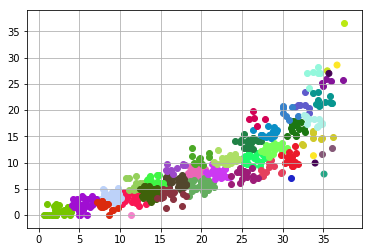

Number of clusters:  38
Current iteration:  5


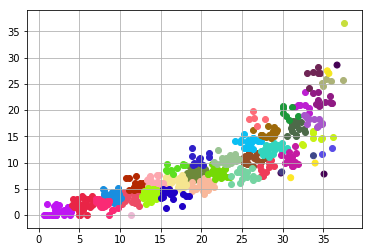

Number of clusters:  38
Current iteration:  6


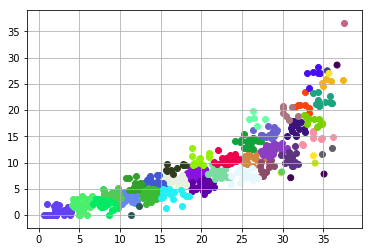

Number of clusters:  38
Current iteration:  7


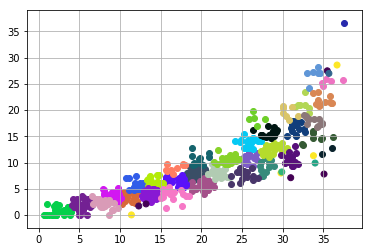

Number of clusters:  38
Current iteration:  8


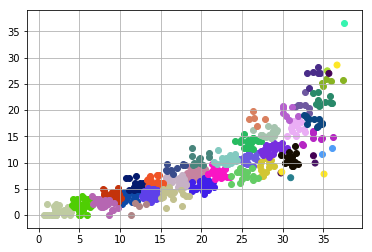

Number of clusters:  38


In [7]:
## DP-Means Implementation: ##

# Parameter Initializations
LAMBDA = 8
convergence_threshold = 1

num_points = len(data_matrix[:,0])

total_indices = np.arange(num_points)

### DP Means - Initializations for algorithm ###
# cluster count
K = 1

# sets of points that make up clusters
L = []
L.append(range(num_points))

# Class indicators/labels
Z = np.ones((1,num_points))

# means
MU = []
MU.append(np.mean(data_matrix,axis=0))
################################################

#print(total_indices)
##shuffled_indices = random.sample(list(total_indices), len(total_indices))
#print(shuffled_indices)

# Initializations for algorithm:
converged = 0
t = 0
while converged == 0:
    t += 1
    print('Current iteration: ',t)
    
    ## Per Data Point: ##
    ##for i in shuffled_indices:#np.arange(num_points):
    for i in np.arange(num_points):
        
        ### CODE 1 - Calculate distance from current point to all currently existing clusters ###
        ## Write code below here:
        #print(shuffled_indices[i])
        
        current_point = data_matrix[i,:]
        #print(current_point)
        cluster_distance_list = []
        for c in np.arange(K):
            distance_currentpoint_to_cluster_c = np.linalg.norm(current_point - MU[c])**2 
            cluster_distance_list.append(distance_currentpoint_to_cluster_c)
        #########################################################################################
        
        
        ### CODE 2 - Look at how the min distance of the cluster distance list compares to LAMBDA ###
        ## Write code below here:

        if (np.min(cluster_distance_list) > LAMBDA):
            # make new cluster solely consisting of the new point
            K += 1
            Z[0][i] = np.copy(K)
            MU.append(current_point)
        else:
            # assign point to the closest cluster
            Z[0][i] = np.argmin(cluster_distance_list) + 1
        #############################################################################################
    
    ### CODE 3 - Form new sets of points (clusters) ###
    ## Write code below here:
    L = []
    for unique_label in np.unique(Z):
        indices_of_occurence = Z[0]==unique_label
        indices_of_points = total_indices[indices_of_occurence]
        L.append(indices_of_points)
    ##################################################################
    
    ### CODE 4 - Recompute means per cluster ###
    ## Write code below here:
    MU_previous = MU
    MU = []
    for l in np.arange(len(L)):
        MU.append(np.mean(data_matrix[L[l],:],axis=0))
    MU_current = MU
    ####################################################
    
    ### CODE 5 - Plot clustered data per iteration ###
    ## Write code below here:
    fig = plt.figure()
    for l in np.arange(len(L)):
        # plot the current set of points with a random color
        plt.scatter(data_matrix[L[l],0], data_matrix[L[l],1], c=np.random.rand(3,1).ravel())
    plt.grid()
    plt.show()
    ##########################################################
    
    ### CODE 6 - Test for convergence: number of clusters doesn't change and means stay the same ###
    ## Write code below here:
    print('Number of clusters: ',K)
    
    if (len(MU_previous) == len(MU_current)):
        # evaluate distance metric
        distance_metric_convergence = 0
        for u in np.arange(len(MU_current)):
            distance_metric_convergence += np.linalg.norm(MU_current[u] - MU_previous[u])
        #print('Distance Threshold: ',distance_metric_convergence)
        if (distance_metric_convergence < convergence_threshold):
            converged = 1
    else:
        converged = 0
    ####################################################





**(d)** Run the DP-Means code created above for the following $\lambda$ values:

$\underline{\lambda} = [4,10,14,24]$.

 Plot the resulting clusters for each $\lambda$ value and discuss the results.   

LAMBDA: 4 


Current iteration:  1


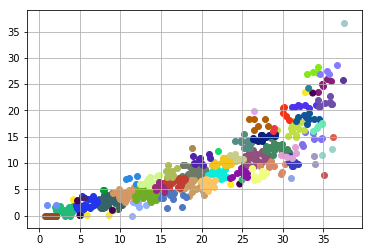

Current iteration:  2


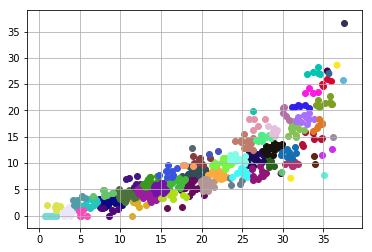

Current iteration:  3


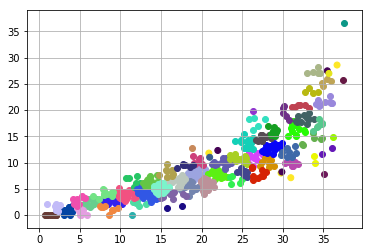

Current iteration:  4


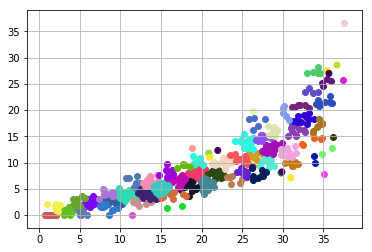

Current iteration:  5


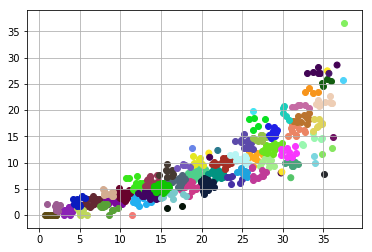

Current iteration:  6


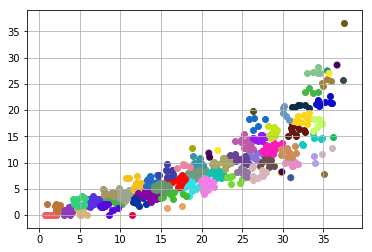

Current iteration:  7


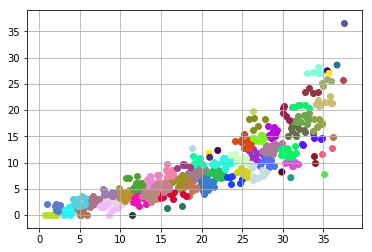

LAMBDA: 10 


Current iteration:  1


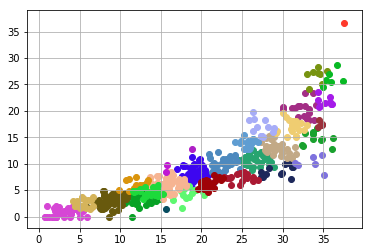

Current iteration:  2


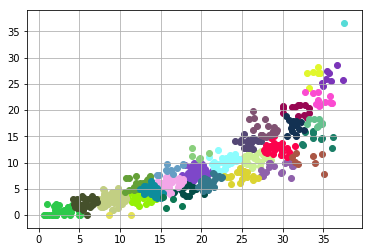

Current iteration:  3


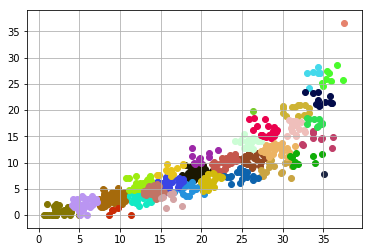

Current iteration:  4


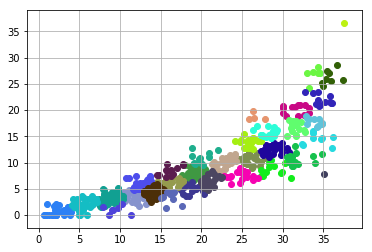

Current iteration:  5


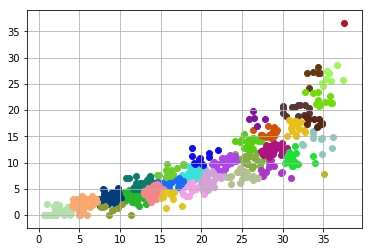

Current iteration:  6


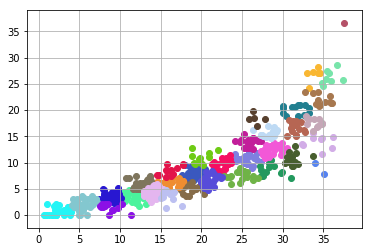

Current iteration:  7


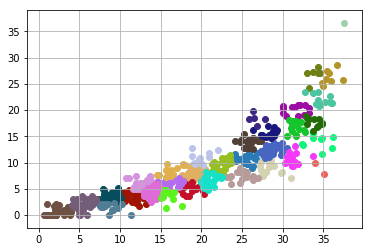

LAMBDA: 14 


Current iteration:  1


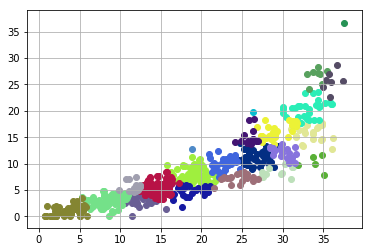

Current iteration:  2


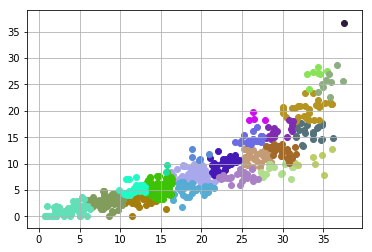

Current iteration:  3


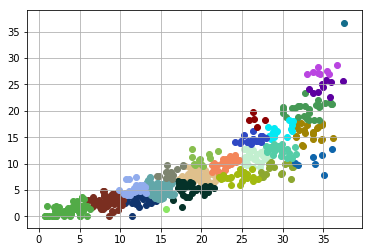

Current iteration:  4


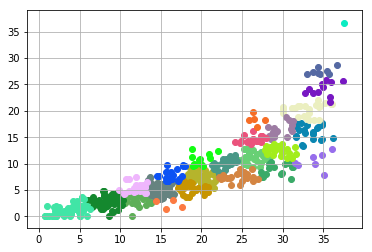

Current iteration:  5


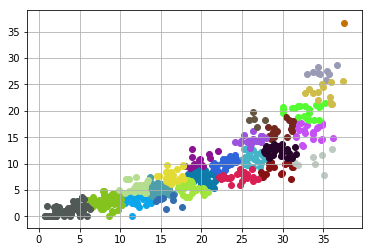

Current iteration:  6


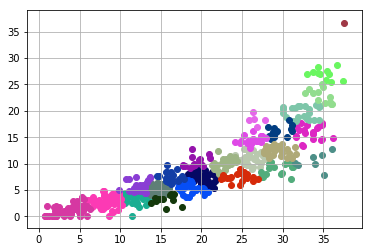

Current iteration:  7


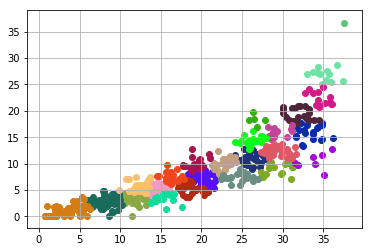

Current iteration:  8


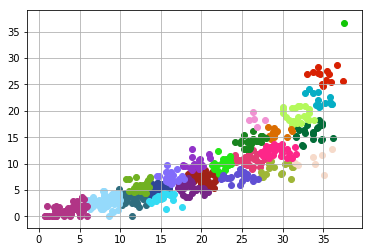

Current iteration:  9


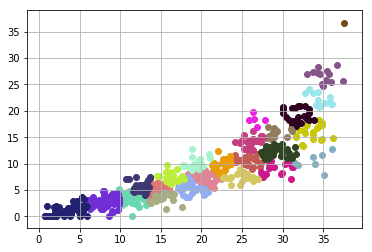

Current iteration:  10


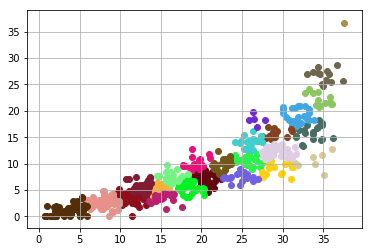

Current iteration:  11


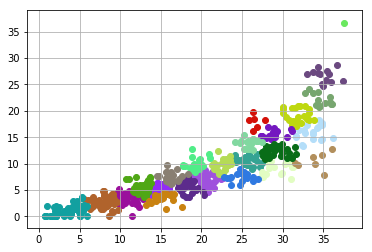

Current iteration:  12


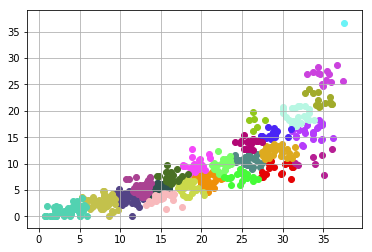

LAMBDA: 24 


Current iteration:  1


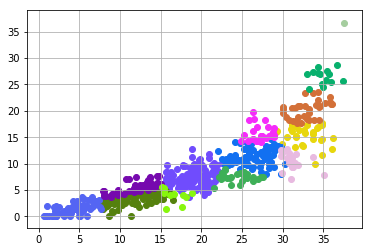

Current iteration:  2


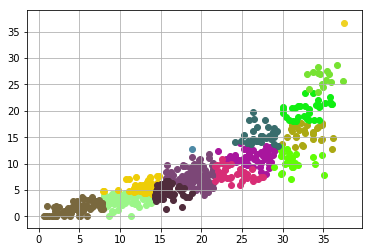

Current iteration:  3


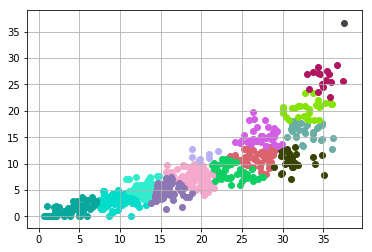

Current iteration:  4


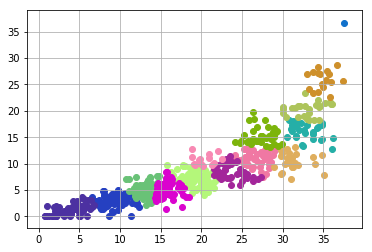

Current iteration:  5


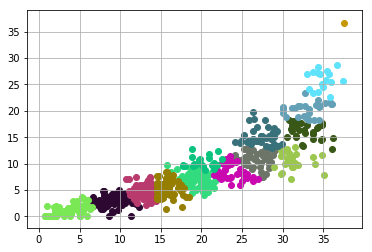

Current iteration:  6


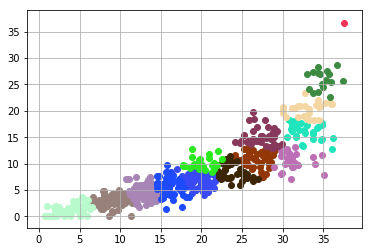

Current iteration:  7


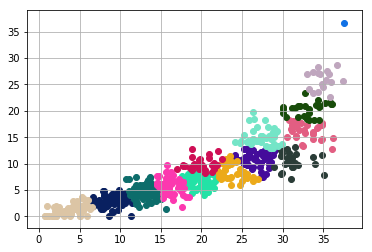

In [8]:
# Plotting of results for different lambdas:

print('LAMBDA: 4','\n\n')
##############
# Lambda - 4##
##############


## DP-Means Implementation: ##

# Parameter Initializations
LAMBDA = 4
convergence_threshold = 1

num_points = len(data_matrix[:,0])

total_indices = np.arange(num_points)

### DP Means - Initializations for algorithm ###
# cluster count
K = 1

# sets of points that make up clusters
L = []
L.append(range(num_points))

# Class indicators/labels
Z = np.ones((1,num_points))

# means
MU = []
MU.append(np.mean(data_matrix,axis=0))
################################################

# Initializations for algorithm:
converged = 0
t = 0
while converged == 0:
    t += 1
    print('Current iteration: ',t)
    
    ## Per Data Point: ##
    for i in np.arange(num_points):
        
        ### CODE 1 - Calculate distance from current point to all currently existing clusters ###
        ## Write code below here:
        
        current_point = data_matrix[i,:]
        cluster_distance_list = []
        for c in np.arange(K):
            distance_currentpoint_to_cluster_c = np.linalg.norm(current_point - MU[c])**2 
            cluster_distance_list.append(distance_currentpoint_to_cluster_c)
        #########################################################################################
        
        
        ### CODE 2 - Look at how the min distance of the cluster distance list compares to LAMBDA ###
        ## Write code below here:

        if (np.min(cluster_distance_list) > LAMBDA):
            # make new cluster solely consisting of the new point
            K += 1
            Z[0][i] = np.copy(K)
            MU.append(current_point)
        else:
            # assign point to the closest cluster
            Z[0][i] = np.argmin(cluster_distance_list) + 1
        #############################################################################################
    
    ### CODE 3 - Form new sets of points (clusters) ###
    ## Write code below here:
    L = []
    for unique_label in np.unique(Z):
        indices_of_occurence = Z[0]==unique_label
        indices_of_points = total_indices[indices_of_occurence]
        L.append(indices_of_points)
    ##################################################################
    
    ### CODE 4 - Recompute means per cluster ###
    ## Write code below here:
    MU_previous = MU
    MU = []
    for l in np.arange(len(L)):
        MU.append(np.mean(data_matrix[L[l],:],axis=0))
    MU_current = MU
    ####################################################
    
    ### CODE 5 - Plot clustered data per iteration ###
    ## Write code below here:
    fig = plt.figure()
    for l in np.arange(len(L)):
        # plot the current set of points with a random color
        plt.scatter(data_matrix[L[l],0], data_matrix[L[l],1], c=np.random.rand(3,1).ravel())
    plt.grid()
    plt.show()
    ##########################################################
    
    ### CODE 6 - Test for convergence: number of clusters doesn't change and means stay the same ###
    ## Write code below here:
    
    if (len(MU_previous) == len(MU_current)):
        # evaluate distance metric
        distance_metric_convergence = 0
        for u in np.arange(len(MU_current)):
            distance_metric_convergence += np.linalg.norm(MU_current[u] - MU_previous[u])
        #print('Distance Threshold: ',distance_metric_convergence)
        if (distance_metric_convergence < convergence_threshold):
            converged = 1
    else:
        converged = 0
    ####################################################


print('LAMBDA: 10','\n\n')
##############
# Lambda - 10#
##############


## DP-Means Implementation: ##

# Parameter Initializations
LAMBDA = 10
convergence_threshold = 1

num_points = len(data_matrix[:,0])

total_indices = np.arange(num_points)

### DP Means - Initializations for algorithm ###
# cluster count
K = 1

# sets of points that make up clusters
L = []
L.append(range(num_points))

# Class indicators/labels
Z = np.ones((1,num_points))

# means
MU = []
MU.append(np.mean(data_matrix,axis=0))
################################################

# Initializations for algorithm:
converged = 0
t = 0
while converged == 0:
    t += 1
    print('Current iteration: ',t)
    
    ## Per Data Point: ##
    for i in np.arange(num_points):
        
        ### CODE 1 - Calculate distance from current point to all currently existing clusters ###
        ## Write code below here:
        
        current_point = data_matrix[i,:]
        cluster_distance_list = []
        for c in np.arange(K):
            distance_currentpoint_to_cluster_c = np.linalg.norm(current_point - MU[c])**2 
            cluster_distance_list.append(distance_currentpoint_to_cluster_c)
        #########################################################################################
        
        
        ### CODE 2 - Look at how the min distance of the cluster distance list compares to LAMBDA ###
        ## Write code below here:

        if (np.min(cluster_distance_list) > LAMBDA):
            # make new cluster solely consisting of the new point
            K += 1
            Z[0][i] = np.copy(K)
            MU.append(current_point)
        else:
            # assign point to the closest cluster
            Z[0][i] = np.argmin(cluster_distance_list) + 1
        #############################################################################################
    
    ### CODE 3 - Form new sets of points (clusters) ###
    ## Write code below here:
    L = []
    for unique_label in np.unique(Z):
        indices_of_occurence = Z[0]==unique_label
        indices_of_points = total_indices[indices_of_occurence]
        L.append(indices_of_points)
    ##################################################################
    
    ### CODE 4 - Recompute means per cluster ###
    ## Write code below here:
    MU_previous = MU
    MU = []
    for l in np.arange(len(L)):
        MU.append(np.mean(data_matrix[L[l],:],axis=0))
    MU_current = MU
    ####################################################
    
    ### CODE 5 - Plot clustered data per iteration ###
    ## Write code below here:
    fig = plt.figure()
    for l in np.arange(len(L)):
        # plot the current set of points with a random color
        plt.scatter(data_matrix[L[l],0], data_matrix[L[l],1], c=np.random.rand(3,1).ravel())
    plt.grid()
    plt.show()
    ##########################################################
    
    ### CODE 6 - Test for convergence: number of clusters doesn't change and means stay the same ###
    ## Write code below here:
    
    if (len(MU_previous) == len(MU_current)):
        # evaluate distance metric
        distance_metric_convergence = 0
        for u in np.arange(len(MU_current)):
            distance_metric_convergence += np.linalg.norm(MU_current[u] - MU_previous[u])
        #print('Distance Threshold: ',distance_metric_convergence)
        if (distance_metric_convergence < convergence_threshold):
            converged = 1
    else:
        converged = 0
    ####################################################


print('LAMBDA: 14','\n\n')
##############
# Lambda - 14#
##############

## DP-Means Implementation: ##

# Parameter Initializations
LAMBDA = 14
convergence_threshold = 1

num_points = len(data_matrix[:,0])

total_indices = np.arange(num_points)

### DP Means - Initializations for algorithm ###
# cluster count
K = 1

# sets of points that make up clusters
L = []
L.append(range(num_points))

# Class indicators/labels
Z = np.ones((1,num_points))

# means
MU = []
MU.append(np.mean(data_matrix,axis=0))
################################################

# Initializations for algorithm:
converged = 0
t = 0
while converged == 0:
    t += 1
    print('Current iteration: ',t)
    
    ## Per Data Point: ##
    for i in np.arange(num_points):
        
        ### CODE 1 - Calculate distance from current point to all currently existing clusters ###
        ## Write code below here:
        
        current_point = data_matrix[i,:]
        cluster_distance_list = []
        for c in np.arange(K):
            distance_currentpoint_to_cluster_c = np.linalg.norm(current_point - MU[c])**2 
            cluster_distance_list.append(distance_currentpoint_to_cluster_c)
        #########################################################################################
        
        
        ### CODE 2 - Look at how the min distance of the cluster distance list compares to LAMBDA ###
        ## Write code below here:

        if (np.min(cluster_distance_list) > LAMBDA):
            # make new cluster solely consisting of the new point
            K += 1
            Z[0][i] = np.copy(K)
            MU.append(current_point)
        else:
            # assign point to the closest cluster
            Z[0][i] = np.argmin(cluster_distance_list) + 1
        #############################################################################################
    
    ### CODE 3 - Form new sets of points (clusters) ###
    ## Write code below here:
    L = []
    for unique_label in np.unique(Z):
        indices_of_occurence = Z[0]==unique_label
        indices_of_points = total_indices[indices_of_occurence]
        L.append(indices_of_points)
    ##################################################################
    
    ### CODE 4 - Recompute means per cluster ###
    ## Write code below here:
    MU_previous = MU
    MU = []
    for l in np.arange(len(L)):
        MU.append(np.mean(data_matrix[L[l],:],axis=0))
    MU_current = MU
    ####################################################
    
    ### CODE 5 - Plot clustered data per iteration ###
    ## Write code below here:
    fig = plt.figure()
    for l in np.arange(len(L)):
        # plot the current set of points with a random color
        plt.scatter(data_matrix[L[l],0], data_matrix[L[l],1], c=np.random.rand(3,1).ravel())
    plt.grid()
    plt.show()
    ##########################################################
    
    ### CODE 6 - Test for convergence: number of clusters doesn't change and means stay the same ###
    ## Write code below here:
    
    if (len(MU_previous) == len(MU_current)):
        # evaluate distance metric
        distance_metric_convergence = 0
        for u in np.arange(len(MU_current)):
            distance_metric_convergence += np.linalg.norm(MU_current[u] - MU_previous[u])
        #print('Distance Threshold: ',distance_metric_convergence)
        if (distance_metric_convergence < convergence_threshold):
            converged = 1
    else:
        converged = 0
    ####################################################

print('LAMBDA: 24','\n\n')
##############
# Lambda - 24#
##############

## DP-Means Implementation: ##

# Parameter Initializations
LAMBDA = 24
convergence_threshold = 1

num_points = len(data_matrix[:,0])

total_indices = np.arange(num_points)

### DP Means - Initializations for algorithm ###
# cluster count
K = 1

# sets of points that make up clusters
L = []
L.append(range(num_points))

# Class indicators/labels
Z = np.ones((1,num_points))

# means
MU = []
MU.append(np.mean(data_matrix,axis=0))
################################################

# Initializations for algorithm:
converged = 0
t = 0
while converged == 0:
    t += 1
    print('Current iteration: ',t)
    
    ## Per Data Point: ##
    for i in np.arange(num_points):
        
        ### CODE 1 - Calculate distance from current point to all currently existing clusters ###
        ## Write code below here:
        
        current_point = data_matrix[i,:]
        cluster_distance_list = []
        for c in np.arange(K):
            distance_currentpoint_to_cluster_c = np.linalg.norm(current_point - MU[c])**2 
            cluster_distance_list.append(distance_currentpoint_to_cluster_c)
        #########################################################################################
        
        
        ### CODE 2 - Look at how the min distance of the cluster distance list compares to LAMBDA ###
        ## Write code below here:

        if (np.min(cluster_distance_list) > LAMBDA):
            # make new cluster solely consisting of the new point
            K += 1
            Z[0][i] = np.copy(K)
            MU.append(current_point)
        else:
            # assign point to the closest cluster
            Z[0][i] = np.argmin(cluster_distance_list) + 1
        #############################################################################################
    
    ### CODE 3 - Form new sets of points (clusters) ###
    ## Write code below here:
    L = []
    for unique_label in np.unique(Z):
        indices_of_occurence = Z[0]==unique_label
        indices_of_points = total_indices[indices_of_occurence]
        L.append(indices_of_points)
    ##################################################################
    
    ### CODE 4 - Recompute means per cluster ###
    ## Write code below here:
    MU_previous = MU
    MU = []
    for l in np.arange(len(L)):
        MU.append(np.mean(data_matrix[L[l],:],axis=0))
    MU_current = MU
    ####################################################
    
    ### CODE 5 - Plot clustered data per iteration ###
    ## Write code below here:
    fig = plt.figure()
    for l in np.arange(len(L)):
        # plot the current set of points with a random color
        plt.scatter(data_matrix[L[l],0], data_matrix[L[l],1], c=np.random.rand(3,1).ravel())
    plt.grid()
    plt.show()
    ##########################################################
    
    ### CODE 6 - Test for convergence: number of clusters doesn't change and means stay the same ###
    ## Write code below here:
    
    if (len(MU_previous) == len(MU_current)):
        # evaluate distance metric
        distance_metric_convergence = 0
        for u in np.arange(len(MU_current)):
            distance_metric_convergence += np.linalg.norm(MU_current[u] - MU_previous[u])
        #print('Distance Threshold: ',distance_metric_convergence)
        if (distance_metric_convergence < convergence_threshold):
            converged = 1
    else:
        converged = 0
    ####################################################


# discussion of results:
# Larger \lambda, fewer clusters since a larger distance threshold for extra cluster creation is used.